In [1]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Rename the column of gender to is_male, where 1 indicates male and female otherwise

In [6]:
df.rename(columns={'Gender': 'Is_Male'}, inplace=True)

In [7]:
df.head()

,Customer Name,Customer e-mail,Country,Is_Male,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


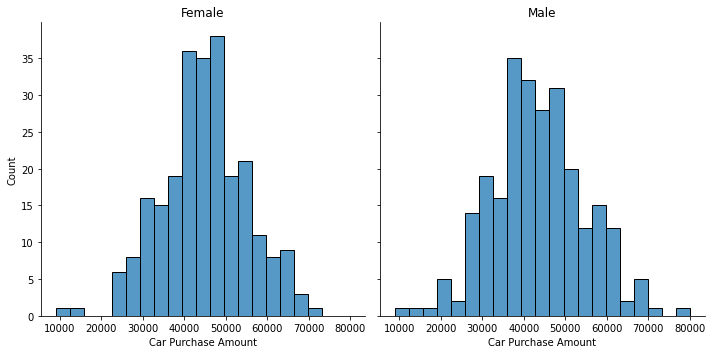

In [8]:
d = sns.displot(data=df, x="Car Purchase Amount", col="Is_Male",)
d.axes[0][0].set_title('Female')
d.axes[0][1].set_title('Male')
plt.show()

In [9]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr().drop(columns=cols, index='Car Purchase Amount').T

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_20528/3035484852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  P = df.corr().drop(columns=cols, index='Car Purchase Amount').T


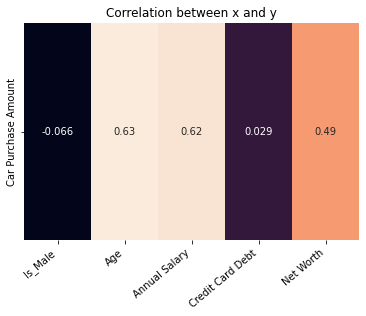

In [10]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

 Correlation between all dataset to see if X are related to each other (Multicorrlinearlity)

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_20528/1876471084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False, )


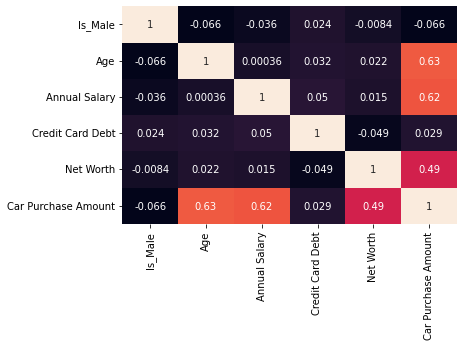

In [11]:
sns.heatmap(df.corr(), annot=True, cbar=False, )
plt.show()

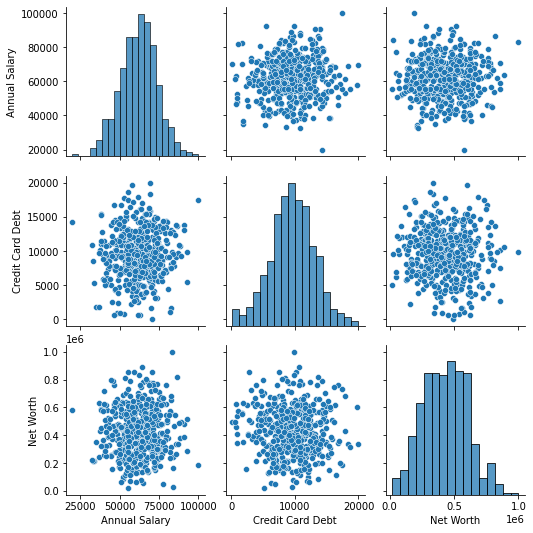

In [12]:
sns.pairplot(data=df.drop(columns=['Age', 'Is_Male', 'Car Purchase Amount']))

In [13]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

co.uk against others

In [14]:
def get_domain_email(email):
    after_at = email.split('@')[1]
    first_dot = after_at.find('.') + 1
    return  after_at[first_dot:]

df['_Email domain'] = df['Customer e-mail'].apply(get_domain_email)
df['_Email Kind'] = df['_Email domain'].apply(lambda domain: 'co.uk' if domain == 'co.uk' else 'other' )

<AxesSubplot:xlabel='_Email domain', ylabel='Car Purchase Amount'>

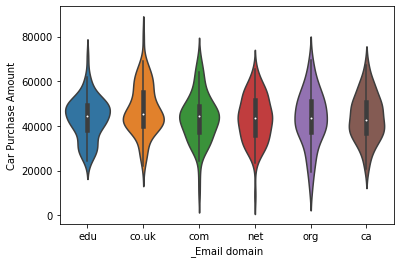

In [15]:
sns.violinplot(data=df, x="_Email domain", y="Car Purchase Amount")

<AxesSubplot:xlabel='_Email Kind', ylabel='Car Purchase Amount'>

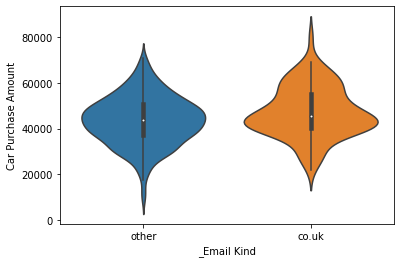

In [16]:
sns.violinplot(data=df, x="_Email Kind", y="Car Purchase Amount")

Choose to see the plots for only 3 looking-like linear feature (Age, Net Worth and Annual Salary)

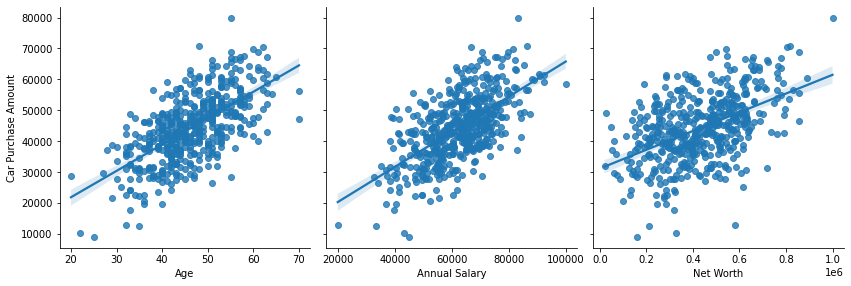

In [17]:
x_elements = ['Age', 'Annual Salary', 'Net Worth']
y_elements = 'Car Purchase Amount'
sns.pairplot(data=df, x_vars=x_elements, y_vars=y_elements, kind="reg", height=4, )

 Therefore, looking from the plots, we can see that there are mainly 3 features that look linear and can be used to train the model. *Age*, *Net Worth* and *Annual Salary*

At first trial, we will include all the features to our model to see if this will give good results

Define X and y for the model

In [18]:
X = df[['Age', 'Annual Salary', 'Net Worth', 'Credit Card Debt', 'Is_Male']]
y = df['Car Purchase Amount']

Divide the data into train and test data. We'll use 70% for the train dataset and 30% for the test dataset.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Create a linear regression model and fit the data with the train dataset

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

See beta 0 (intercept value for the regression equation)

In [22]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -42051.53097042995


See the rest of coefficients (b1, b2, b3)

In [23]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1


The value of b(1, 'Age') = 839.2178047808953
The value of b(2, 'Annual Salary') = 0.5624457297995292
The value of b(3, 'Net Worth') = 0.028915391503683215
The value of b(4, 'Credit Card Debt') = 0.004112080381060687
The value of b(5, 'Is_Male') = 25.914890698069364


Now, we test our model with the test data

In [24]:
y_pred = model.predict(X_train)

Calculate the mean error for the *train* data

In [25]:
print('MAE:', mean_absolute_error(y_train, y_pred))
print('MSE:', mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

MAE: 204.73922004211565
MSE: 56351.96968561277
RMSE: 237.38569814884124


$ R^2 $ Calculation

In [26]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9994533249310735


Calculate the mean error for the *test* data

In [27]:
y_pred = model.predict(X_test)

In [28]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 213.6874643130547
MSE: 61176.59770063306
RMSE: 247.3390339203116


In [29]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.434e+05
Date:                 Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                         17:28:34   Log-Likelihood:                -2411.0
No. Observations:                  350   AIC:                             4834.
Df Residuals:                      344   BIC:                             4857.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.205e+04    111.430   -377.380      0.000   -4.23e+04   -4.18e+04
Age                839.2178      1.645    510.115      0.000     835.982     842.454
Annual Salary        0.5624      0.001    519.347      0.000       0.560       0.565
Net Worth            0.0289   7.32e-05    395.027      0.000       0.029       0.029
Credit Card Debt     0.0041      0.004      1.071      0.285      -0.003       0.012
Is_Male             25.9149     25.733      1.007      0.315     -24.698      76.528
==============================================================================
Omnibus:                      150.193   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.633
Skew:                          -0.058   Prob(JB):                     5.46e-05
Kurtosis:                       1.846   Cond. No.                     4.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, we can say that credit card debt and gender features doesn't impact the car price that much, since the graph doesn't look linear and the t scores are close to 0 and p values are greater than the alpha ( 0.05 ). Thus, there are NOT statistically significant for the model.

We create another model where we take out credit debt and gender feature.

In [30]:
X = df[['Age', 'Annual Salary', 'Net Worth']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -42106.73804753039


In [34]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1

The value of b(1, 'Age') = 841.2362920021592
The value of b(2, 'Annual Salary') = 0.5619598017379506
The value of b(3, 'Net Worth') = 0.02899383478402924


In [35]:
y_pred = model.predict(X_train)

Calculate Mean Error on the *train* data

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 206.66187181132173
MSE: 57338.76643554455
RMSE: 239.4551449343792


$ R^2 $ calculation

In [37]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9994649024290018


Calculate Mean Error on the *test* data

In [38]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 216.39411661120775
MSE: 61528.174269522206
RMSE: 248.04873365837247


In [39]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.334e+05
Date:                 Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                         17:28:34   Log-Likelihood:                -2414.1
No. Observations:                  350   AIC:                             4836.
Df Residuals:                      346   BIC:                             4852.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.211e+04    105.242   -400.096      0.000   -4.23e+04   -4.19e+04
Age             841.2363      1.604    524.551      0.000     838.082     844.391
Annual Salary     0.5620      0.001    500.820      0.000       0.560       0.564
Net Worth         0.0290   7.51e-05    386.313      0.000       0.029       0.029
==============================================================================
Omnibus:                      159.123   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.910
Skew:                          -0.050   Prob(JB):                     4.75e-05
Kurtosis:                       1.836   Cond. No.                     3.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BELOW CODE SECTION CAN BE FUN TO PLAY WITH ON COLAB

In [40]:
#@title Let's try with another input
#@markdown Features
AGE = 30  #@param {type: "slider", min: 20, max: 70}
Annual_Salary = 20000  #@param {type: "slider", min: 20000, max: 100000}
Net_worth = 40000  #@param {type: "slider", min: 20000, max: 100000}

In [41]:
PREDICTED = model.intercept_ + model.coef_[0] * AGE + model.coef_[1] * Annual_Salary * model.coef_[2] * Net_worth
print(f"If you're {AGE} years old, having an annual salary of ${Annual_Salary:,.2f} and net worth of ${Net_worth:,.2f}\nThe predicted car price you're willing to buy is around ${PREDICTED:,.2f}")

If you're 30 years old, having an annual salary of $20,000.00 and net worth of $40,000.00
The predicted car price you're willing to buy is around $13,017,826.07
